### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

512 px cropped by Optic Disc area and resized to 128 px images were used.

You can either train your model or upload a pre-trained one from:
*../models_weights/02.03,13:57,OD Cup, U-Net light on DRISHTI-GS 512 px cropped to OD 128 px fold 0, SGD, log_dice loss/last_checkpoint.hdf5*

In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import h5py
from model import *

In [4]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, \
    Conv2D, MaxPooling2D, ZeroPadding2D, Input, Embedding, \
    Lambda, UpSampling2D, Cropping2D, Concatenate
from keras.utils import np_utils
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, CSVLogger

In [5]:
print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.3.1
TensorFlow version: 1.14.0


In [6]:
K.set_image_data_format('channels_first')

In [7]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

In [8]:
model = get_unet_light(img_rows=128, img_cols=128)
model.compile(optimizer=SGD(lr=1e-4, momentum=0.95),
              loss=log_dice_loss,
              metrics=[mean_IOU_gpu, dice_metric])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\Rosana\Documents\Mestrado\dissertacao\codigo_unet\scripts\model.py:110: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input=inputs, output=conv10)


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [9]:
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

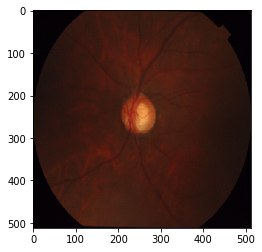

(50, 512, 512, 3)


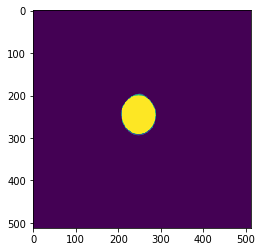

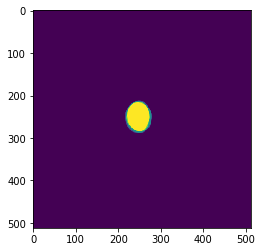

In [10]:
plt.imshow(img_train[0])
plt.show()
print(img_train.shape)
plt.imshow(np.squeeze(disc_train[0]))
plt.show()
plt.imshow(np.squeeze(cup_train[0]))
plt.show()

In [11]:
img_train, cup_train, disc_train, disc_locations

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

#### Generator of augmented data:

Testing the data generator and generator for augmented data:

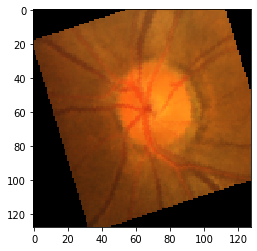

In [17]:
gen = data_generator(img_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

In [18]:
arch_name = "OD Cup, U-Net light on DRISHTI-GS 512 px cropped to OD 128 px fold 0, SGD, log_dice loss"
weights_folder = os.path.join(os.path.dirname(os.getcwd()), 'models_weights',
                              '{}'.format(arch_name))

In [19]:
def folder(folder_name):
    if not os.path.exists(folder_name):
        os.makedirs(folder_name)
    return folder_name

In [20]:
img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

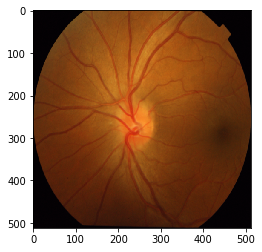

51


In [21]:
plt.imshow(img_test[50])
plt.show()
print(len(img_test))

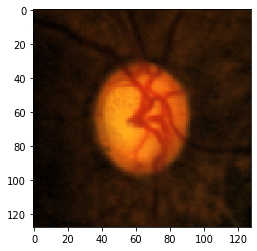

In [22]:
X_valid, Y_valid = next(data_generator(img_test, cup_test, disc_locations_test, train_or_test='test', batch_size=100, stationary=True))

In [23]:
len(X_valid)

50

### Training

If a pretrained model needs to be used, first run "Loading model" section below and then go the "Comprehensive visual check", skipping this section.

C:\ProgramData\Anaconda3\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


Epoch 1/500
99/99 [==============================] - 43s 435ms/step - loss: 1.5119 - mean_IOU_gpu: 0.0725 - dice_metric: 0.1341 - val_loss: 1.4931 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 2/500
99/99 [==============================] - 41s 419ms/step - loss: 1.5313 - mean_IOU_gpu: 0.0786 - dice_metric: 0.1452 - val_loss: 1.4467 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 3/500
99/99 [==============================] - 37s 375ms/step - loss: 1.4411 - mean_IOU_gpu: 0.0660 - dice_metric: 0.1227 - val_loss: 1.3885 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 4/500
99/99 [==============================] - 37s 376ms/step - loss: 1.4566 - mean_IOU_gpu: 0.0708 - dice_metric: 0.1301 - val_loss: 1.3205 - val_mean_IOU_gpu: 0.0000e+00 - val_dice_metric: 0.0000e+00
Epoch 5/500
99/99 [==============================] - 37s 376ms/step - loss: 1.3729 - mean_IOU_gpu: 0.1106 - dice_metric: 0.1920 - val_loss: 1.2213 - val_mean_IOU_gpu: 0

Epoch 82/500
99/99 [==============================] - 69s 696ms/step - loss: 0.1756 - mean_IOU_gpu: 0.6907 - dice_metric: 0.8084 - val_loss: 1.4331 - val_mean_IOU_gpu: 0.1829 - val_dice_metric: 0.2557
Epoch 83/500
99/99 [==============================] - 69s 699ms/step - loss: 0.1672 - mean_IOU_gpu: 0.7072 - dice_metric: 0.8188 - val_loss: 1.1605 - val_mean_IOU_gpu: 0.2383 - val_dice_metric: 0.3249
Epoch 84/500
99/99 [==============================] - 69s 701ms/step - loss: 0.1460 - mean_IOU_gpu: 0.7238 - dice_metric: 0.8333 - val_loss: 0.6138 - val_mean_IOU_gpu: 0.4273 - val_dice_metric: 0.5398
Epoch 85/500
99/99 [==============================] - 70s 706ms/step - loss: 0.1780 - mean_IOU_gpu: 0.6967 - dice_metric: 0.8099 - val_loss: 0.8137 - val_mean_IOU_gpu: 0.3353 - val_dice_metric: 0.4419
Epoch 86/500
99/99 [==============================] - 71s 713ms/step - loss: 0.1626 - mean_IOU_gpu: 0.7048 - dice_metric: 0.8191 - val_loss: 0.7054 - val_mean_IOU_gpu: 0.4118 - val_dice_metric: 0.

Epoch 123/500
99/99 [==============================] - 83s 841ms/step - loss: 0.1470 - mean_IOU_gpu: 0.7248 - dice_metric: 0.8345 - val_loss: 0.7287 - val_mean_IOU_gpu: 0.4385 - val_dice_metric: 0.5335
Epoch 124/500
99/99 [==============================] - 83s 838ms/step - loss: 0.1466 - mean_IOU_gpu: 0.7222 - dice_metric: 0.8328 - val_loss: 0.8558 - val_mean_IOU_gpu: 0.3950 - val_dice_metric: 0.4843
Epoch 125/500
99/99 [==============================] - 83s 843ms/step - loss: 0.1656 - mean_IOU_gpu: 0.7072 - dice_metric: 0.8197 - val_loss: 0.6643 - val_mean_IOU_gpu: 0.4581 - val_dice_metric: 0.5551
Epoch 126/500
99/99 [==============================] - 83s 843ms/step - loss: 0.1624 - mean_IOU_gpu: 0.6994 - dice_metric: 0.8161 - val_loss: 0.6042 - val_mean_IOU_gpu: 0.4700 - val_dice_metric: 0.5674
Epoch 127/500
99/99 [==============================] - 84s 851ms/step - loss: 0.1570 - mean_IOU_gpu: 0.7106 - dice_metric: 0.8234 - val_loss: 1.6278 - val_mean_IOU_gpu: 0.2099 - val_dice_metri

Epoch 204/500
99/99 [==============================] - 125s 1s/step - loss: 0.1398 - mean_IOU_gpu: 0.7301 - dice_metric: 0.8384 - val_loss: 0.5277 - val_mean_IOU_gpu: 0.5371 - val_dice_metric: 0.6423
Epoch 205/500
99/99 [==============================] - 126s 1s/step - loss: 0.1308 - mean_IOU_gpu: 0.7454 - dice_metric: 0.8485 - val_loss: 1.1432 - val_mean_IOU_gpu: 0.3333 - val_dice_metric: 0.4221
Epoch 206/500
99/99 [==============================] - 140s 1s/step - loss: 0.1152 - mean_IOU_gpu: 0.7667 - dice_metric: 0.8643 - val_loss: 0.9782 - val_mean_IOU_gpu: 0.3949 - val_dice_metric: 0.4859
Epoch 207/500
99/99 [==============================] - 125s 1s/step - loss: 0.1202 - mean_IOU_gpu: 0.7555 - dice_metric: 0.8561 - val_loss: 1.5964 - val_mean_IOU_gpu: 0.2462 - val_dice_metric: 0.3211
Epoch 208/500
99/99 [==============================] - 124s 1s/step - loss: 0.1253 - mean_IOU_gpu: 0.7475 - dice_metric: 0.8514 - val_loss: 1.1252 - val_mean_IOU_gpu: 0.3541 - val_dice_metric: 0.4402


Epoch 245/500
99/99 [==============================] - 146s 1s/step - loss: 0.1184 - mean_IOU_gpu: 0.7620 - dice_metric: 0.8597 - val_loss: 1.1078 - val_mean_IOU_gpu: 0.3258 - val_dice_metric: 0.4166
Epoch 246/500
99/99 [==============================] - 136s 1s/step - loss: 0.1110 - mean_IOU_gpu: 0.7724 - dice_metric: 0.8679 - val_loss: 1.1349 - val_mean_IOU_gpu: 0.3059 - val_dice_metric: 0.4006
Epoch 247/500
99/99 [==============================] - 139s 1s/step - loss: 0.1014 - mean_IOU_gpu: 0.7851 - dice_metric: 0.8771 - val_loss: 1.2031 - val_mean_IOU_gpu: 0.3163 - val_dice_metric: 0.4118
Epoch 248/500
99/99 [==============================] - 144s 1s/step - loss: 0.1174 - mean_IOU_gpu: 0.7665 - dice_metric: 0.8625 - val_loss: 1.4559 - val_mean_IOU_gpu: 0.2447 - val_dice_metric: 0.3218
Epoch 249/500
99/99 [==============================] - 139s 1s/step - loss: 0.1179 - mean_IOU_gpu: 0.7640 - dice_metric: 0.8618 - val_loss: 1.1859 - val_mean_IOU_gpu: 0.2967 - val_dice_metric: 0.3866


Epoch 286/500
99/99 [==============================] - 128s 1s/step - loss: 0.1018 - mean_IOU_gpu: 0.7871 - dice_metric: 0.8777 - val_loss: 1.5855 - val_mean_IOU_gpu: 0.1991 - val_dice_metric: 0.2758
Epoch 287/500
99/99 [==============================] - 129s 1s/step - loss: 0.1032 - mean_IOU_gpu: 0.7843 - dice_metric: 0.8757 - val_loss: 0.8906 - val_mean_IOU_gpu: 0.3963 - val_dice_metric: 0.4907
Epoch 288/500
99/99 [==============================] - 129s 1s/step - loss: 0.1019 - mean_IOU_gpu: 0.7839 - dice_metric: 0.8760 - val_loss: 1.2495 - val_mean_IOU_gpu: 0.2794 - val_dice_metric: 0.3676
Epoch 289/500
99/99 [==============================] - 129s 1s/step - loss: 0.1029 - mean_IOU_gpu: 0.7858 - dice_metric: 0.8762 - val_loss: 0.9581 - val_mean_IOU_gpu: 0.3555 - val_dice_metric: 0.4545
Epoch 290/500
99/99 [==============================] - 130s 1s/step - loss: 0.1029 - mean_IOU_gpu: 0.7854 - dice_metric: 0.8762 - val_loss: 0.7262 - val_mean_IOU_gpu: 0.4351 - val_dice_metric: 0.5368


Epoch 327/500
99/99 [==============================] - 143s 1s/step - loss: 0.1075 - mean_IOU_gpu: 0.7765 - dice_metric: 0.8704 - val_loss: 1.1035 - val_mean_IOU_gpu: 0.2934 - val_dice_metric: 0.3864
Epoch 328/500
99/99 [==============================] - 144s 1s/step - loss: 0.1035 - mean_IOU_gpu: 0.7819 - dice_metric: 0.8742 - val_loss: 2.3848 - val_mean_IOU_gpu: 0.0955 - val_dice_metric: 0.1380
Epoch 329/500
99/99 [==============================] - 143s 1s/step - loss: 0.1090 - mean_IOU_gpu: 0.7775 - dice_metric: 0.8704 - val_loss: 2.0599 - val_mean_IOU_gpu: 0.1169 - val_dice_metric: 0.1717
Epoch 330/500
99/99 [==============================] - 144s 1s/step - loss: 0.0888 - mean_IOU_gpu: 0.8054 - dice_metric: 0.8901 - val_loss: 0.7018 - val_mean_IOU_gpu: 0.4444 - val_dice_metric: 0.5458
Epoch 331/500
99/99 [==============================] - 145s 1s/step - loss: 0.0941 - mean_IOU_gpu: 0.7953 - dice_metric: 0.8839 - val_loss: 0.7017 - val_mean_IOU_gpu: 0.4541 - val_dice_metric: 0.5579


Epoch 368/500
99/99 [==============================] - 166s 2s/step - loss: 0.0887 - mean_IOU_gpu: 0.8062 - dice_metric: 0.8904 - val_loss: 1.1740 - val_mean_IOU_gpu: 0.2782 - val_dice_metric: 0.3702
Epoch 369/500
99/99 [==============================] - 167s 2s/step - loss: 0.1041 - mean_IOU_gpu: 0.7809 - dice_metric: 0.8735 - val_loss: 0.8630 - val_mean_IOU_gpu: 0.3692 - val_dice_metric: 0.4721
Epoch 370/500
99/99 [==============================] - 166s 2s/step - loss: 0.0843 - mean_IOU_gpu: 0.8143 - dice_metric: 0.8954 - val_loss: 1.0359 - val_mean_IOU_gpu: 0.3045 - val_dice_metric: 0.4036
Epoch 371/500
99/99 [==============================] - 167s 2s/step - loss: 0.1029 - mean_IOU_gpu: 0.7862 - dice_metric: 0.8768 - val_loss: 1.4022 - val_mean_IOU_gpu: 0.2461 - val_dice_metric: 0.3289
Epoch 372/500
99/99 [==============================] - 167s 2s/step - loss: 0.0956 - mean_IOU_gpu: 0.7991 - dice_metric: 0.8856 - val_loss: 0.7451 - val_mean_IOU_gpu: 0.4147 - val_dice_metric: 0.5264


Epoch 409/500
99/99 [==============================] - 187s 2s/step - loss: 0.0970 - mean_IOU_gpu: 0.7930 - dice_metric: 0.8814 - val_loss: 0.8009 - val_mean_IOU_gpu: 0.4084 - val_dice_metric: 0.5184
Epoch 410/500
99/99 [==============================] - 187s 2s/step - loss: 0.0897 - mean_IOU_gpu: 0.8049 - dice_metric: 0.8893 - val_loss: 1.1147 - val_mean_IOU_gpu: 0.2805 - val_dice_metric: 0.3778
Epoch 411/500
99/99 [==============================] - 186s 2s/step - loss: 0.0934 - mean_IOU_gpu: 0.8000 - dice_metric: 0.8861 - val_loss: 0.8752 - val_mean_IOU_gpu: 0.3883 - val_dice_metric: 0.4970
Epoch 412/500
99/99 [==============================] - 189s 2s/step - loss: 0.0847 - mean_IOU_gpu: 0.8130 - dice_metric: 0.8946 - val_loss: 1.8517 - val_mean_IOU_gpu: 0.1409 - val_dice_metric: 0.2057
Epoch 413/500
99/99 [==============================] - 189s 2s/step - loss: 0.0889 - mean_IOU_gpu: 0.8069 - dice_metric: 0.8906 - val_loss: 1.1833 - val_mean_IOU_gpu: 0.2786 - val_dice_metric: 0.3714


Epoch 450/500
99/99 [==============================] - 209s 2s/step - loss: 0.0868 - mean_IOU_gpu: 0.8089 - dice_metric: 0.8921 - val_loss: 1.7663 - val_mean_IOU_gpu: 0.1719 - val_dice_metric: 0.2396
Epoch 451/500
99/99 [==============================] - 209s 2s/step - loss: 0.0940 - mean_IOU_gpu: 0.7990 - dice_metric: 0.8852 - val_loss: 0.7925 - val_mean_IOU_gpu: 0.3803 - val_dice_metric: 0.4901
Epoch 452/500
99/99 [==============================] - 208s 2s/step - loss: 0.0890 - mean_IOU_gpu: 0.8043 - dice_metric: 0.8896 - val_loss: 0.6907 - val_mean_IOU_gpu: 0.4404 - val_dice_metric: 0.5521
Epoch 453/500
99/99 [==============================] - 209s 2s/step - loss: 0.0818 - mean_IOU_gpu: 0.8173 - dice_metric: 0.8976 - val_loss: 1.2958 - val_mean_IOU_gpu: 0.2621 - val_dice_metric: 0.3487
Epoch 454/500
99/99 [==============================] - 209s 2s/step - loss: 0.0827 - mean_IOU_gpu: 0.8145 - dice_metric: 0.8959 - val_loss: 0.2934 - val_mean_IOU_gpu: 0.6298 - val_dice_metric: 0.7371


Epoch 491/500
99/99 [==============================] - 232s 2s/step - loss: 0.0863 - mean_IOU_gpu: 0.8101 - dice_metric: 0.8931 - val_loss: 0.6404 - val_mean_IOU_gpu: 0.4749 - val_dice_metric: 0.5826
Epoch 492/500
99/99 [==============================] - 232s 2s/step - loss: 0.0809 - mean_IOU_gpu: 0.8195 - dice_metric: 0.8995 - val_loss: 0.5882 - val_mean_IOU_gpu: 0.5112 - val_dice_metric: 0.6168
Epoch 493/500
99/99 [==============================] - 234s 2s/step - loss: 0.0805 - mean_IOU_gpu: 0.8212 - dice_metric: 0.8999 - val_loss: 1.0446 - val_mean_IOU_gpu: 0.3316 - val_dice_metric: 0.4303
Epoch 494/500
99/99 [==============================] - 235s 2s/step - loss: 0.0987 - mean_IOU_gpu: 0.7929 - dice_metric: 0.8808 - val_loss: 1.5248 - val_mean_IOU_gpu: 0.2344 - val_dice_metric: 0.3138
Epoch 495/500
99/99 [==============================] - 235s 2s/step - loss: 0.0858 - mean_IOU_gpu: 0.8131 - dice_metric: 0.8944 - val_loss: 2.0753 - val_mean_IOU_gpu: 0.1641 - val_dice_metric: 0.2282


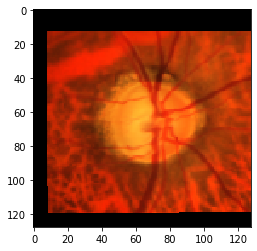

In [25]:
history = model.fit_generator(data_generator(img_train, cup_train, disc_locations, train_or_test='train', batch_size=1), 
                              steps_per_epoch=99,
                              max_queue_size=1,                                                
                              epochs=300, verbose=1,                              
                              callbacks=[CSVLogger(os.path.join(folder(weights_folder), 'training_log_cup_color.csv')),
                                         ModelCheckpoint(os.path.join(folder(weights_folder),
                                               'last_checkpoint_cup_color.hdf5'),
                                               monitor='val_loss', mode='min', save_best_only=True, 
                                               save_weights_only=False, verbose=0)])

### Visual check

image #0


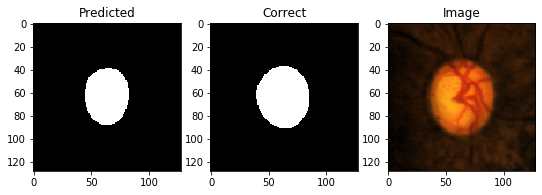

IOU: 0.7725167274475098
Dice: 0.8716608594657376
image #1


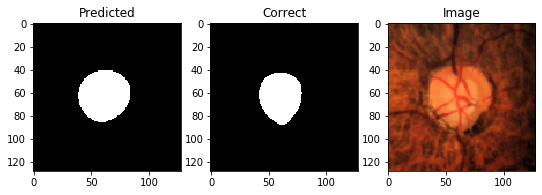

IOU: 0.7823383212089539
Dice: 0.8778785764131193
image #2


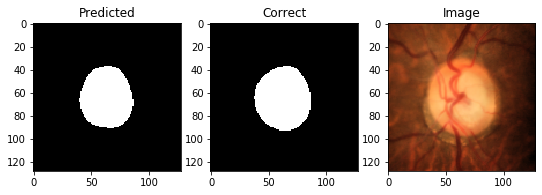

IOU: 0.91057288646698
Dice: 0.9531935641150658
image #3


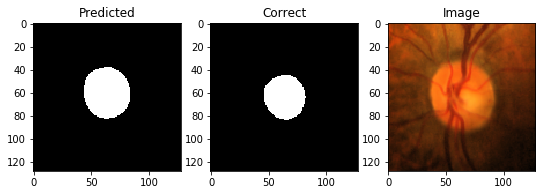

IOU: 0.7351723909378052
Dice: 0.8473767885532592
image #4


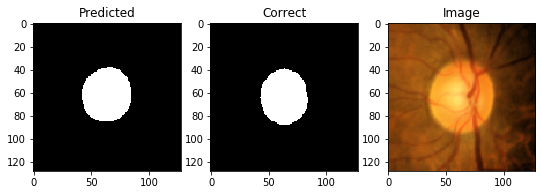

IOU: 0.8792184591293335
Dice: 0.9357277882797732
image #5


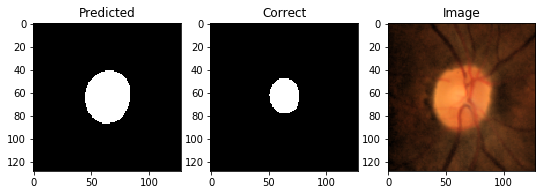

IOU: 0.4385101795196533
Dice: 0.6096726917440156
image #6


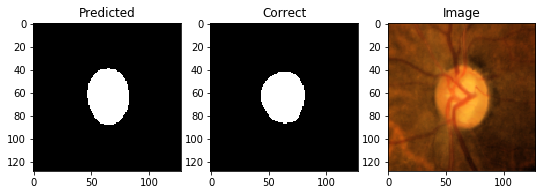

IOU: 0.8487508296966553
Dice: 0.9181884587289992
image #7


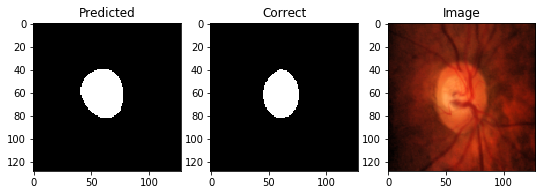

IOU: 0.8108766078948975
Dice: 0.8955625280143433
image #8


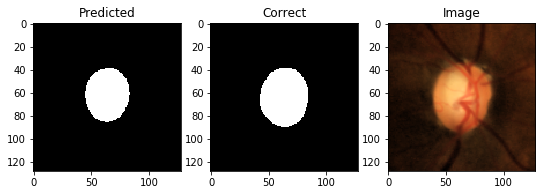

IOU: 0.8270588517189026
Dice: 0.9053444945267225
image #9


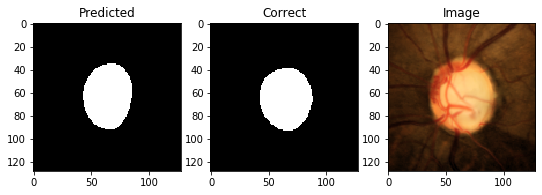

IOU: 0.8772528171539307
Dice: 0.9346133886870783
image #10


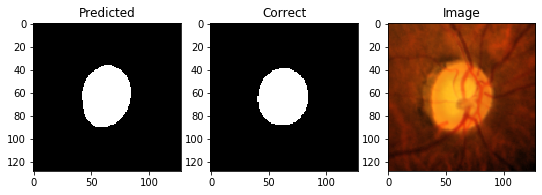

IOU: 0.9057421684265137
Dice: 0.9505400795906765
image #11


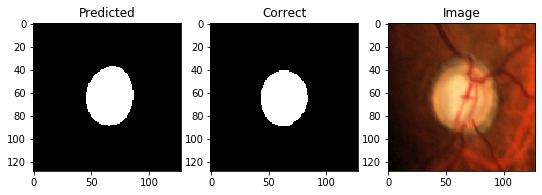

IOU: 0.8214489221572876
Dice: 0.9019730660820545
image #12


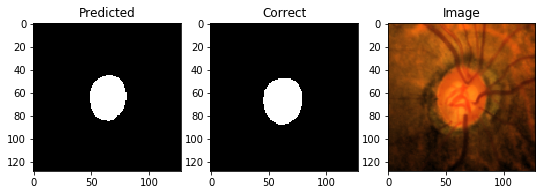

IOU: 0.7987909913063049
Dice: 0.8881421027364378
image #13


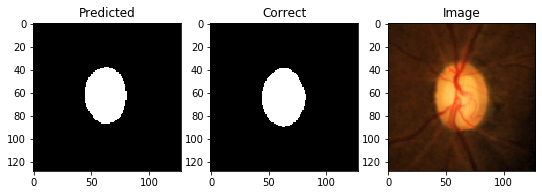

IOU: 0.8858085870742798
Dice: 0.9394469723486174
image #14


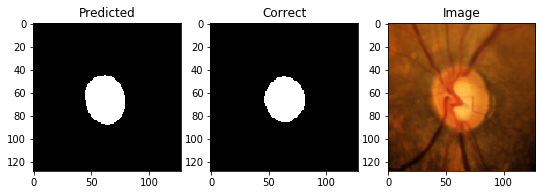

IOU: 0.8241042494773865
Dice: 0.9035714285714286
image #15


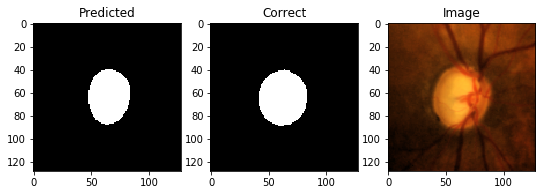

IOU: 0.8097859621047974
Dice: 0.8948969246367016
image #16


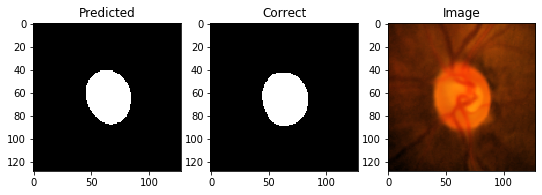

IOU: 0.9017037749290466
Dice: 0.9483115093039284
image #17


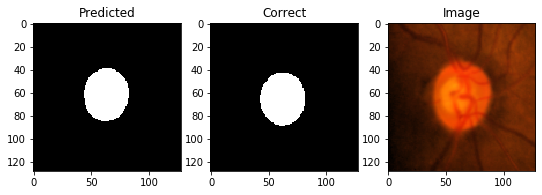

IOU: 0.8135048151016235
Dice: 0.8971631205673759
image #18


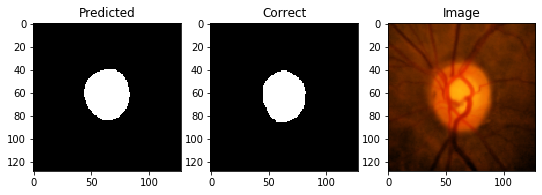

IOU: 0.8783592581748962
Dice: 0.9352409638554217
image #19


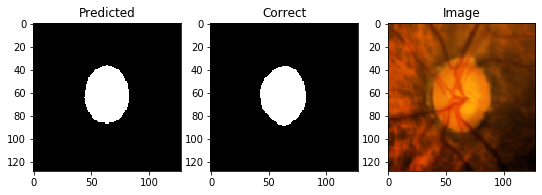

IOU: 0.9453621506690979
Dice: 0.9719137818419333
image #20


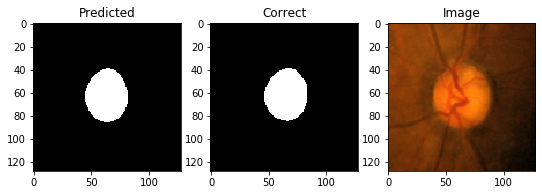

IOU: 0.8475524187088013
Dice: 0.9174867524602573
image #21


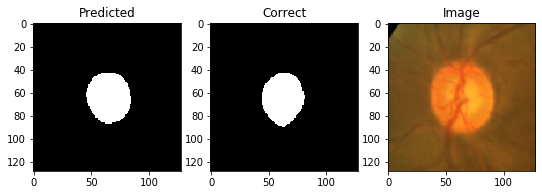

IOU: 0.8208333253860474
Dice: 0.9016018306636155
image #22


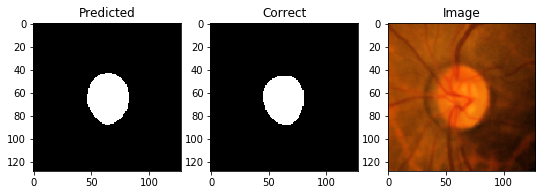

IOU: 0.8844961524009705
Dice: 0.9387083504730563
image #23


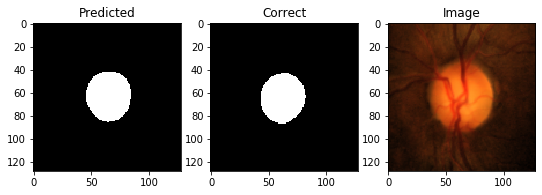

IOU: 0.8181198835372925
Dice: 0.8999625327838142
image #24


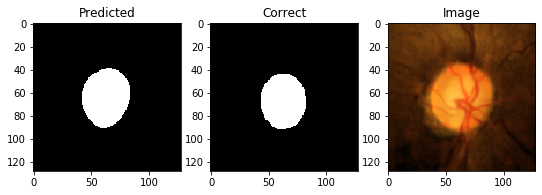

IOU: 0.8127147555351257
Dice: 0.8966824644549763
image #25


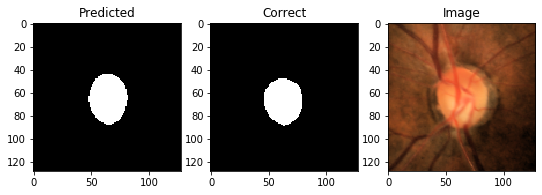

IOU: 0.8368200659751892
Dice: 0.9111617312072893
image #26


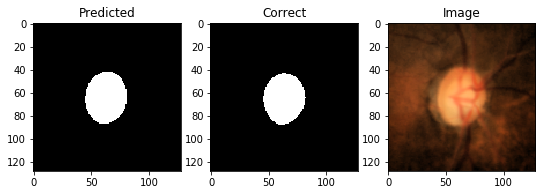

IOU: 0.9062027335166931
Dice: 0.9507936507936507
image #27


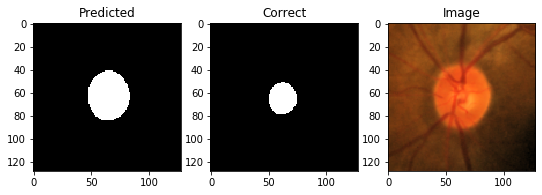

IOU: 0.4347471594810486
Dice: 0.6060261512222854
image #28


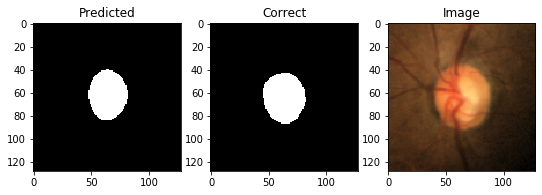

IOU: 0.829657793045044
Dice: 0.9068994181213632
image #29


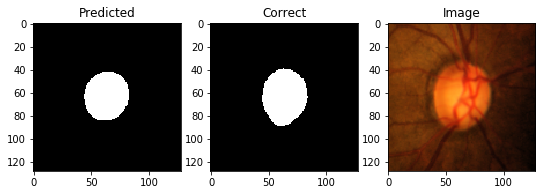

IOU: 0.8546666502952576
Dice: 0.9216391085549964
image #30


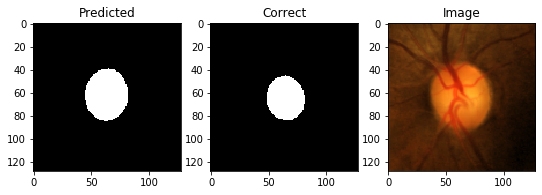

IOU: 0.7265275716781616
Dice: 0.8416055243849806
image #31


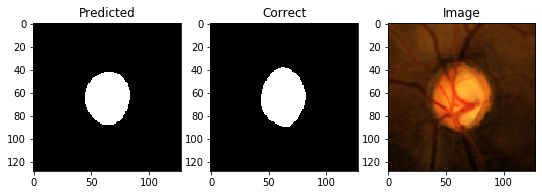

IOU: 0.8759689927101135
Dice: 0.9338842975206612
image #32


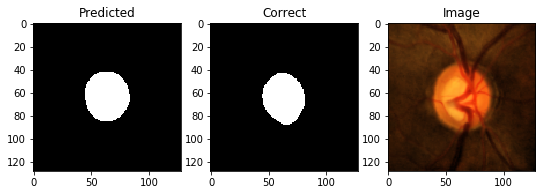

IOU: 0.8724637627601624
Dice: 0.9318885448916409
image #33


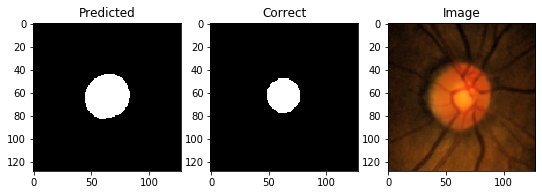

IOU: 0.5777027010917664
Dice: 0.7323340471092077
image #34


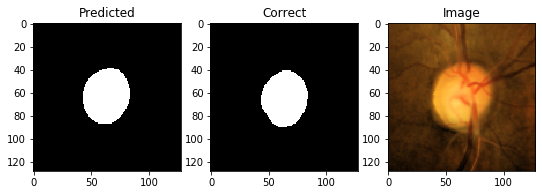

IOU: 0.8522107601165771
Dice: 0.9202092871157619
image #35


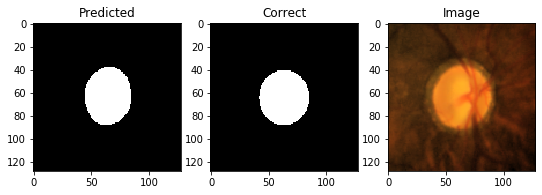

IOU: 0.8929824829101562
Dice: 0.943466172381835
image #36


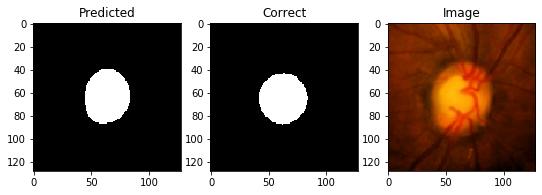

IOU: 0.8676470518112183
Dice: 0.9291338582677166
image #37


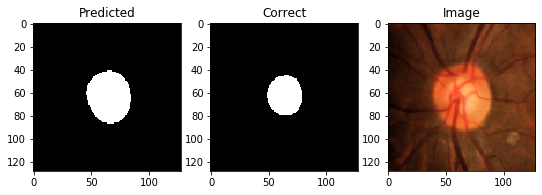

IOU: 0.62189781665802
Dice: 0.7668766876687669
image #38


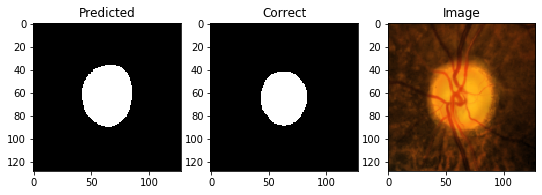

IOU: 0.7894456386566162
Dice: 0.882335418528448
image #39


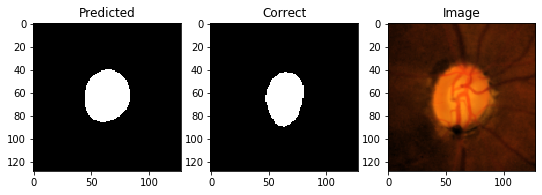

IOU: 0.7618724703788757
Dice: 0.8648440508278783
image #40


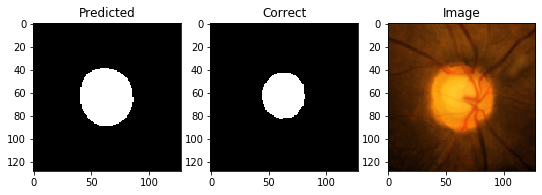

IOU: 0.6353771090507507
Dice: 0.7770404777704047
image #41


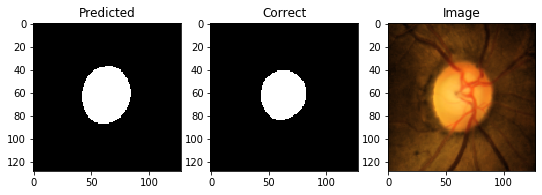

IOU: 0.7942583560943604
Dice: 0.8853333333333333
image #42


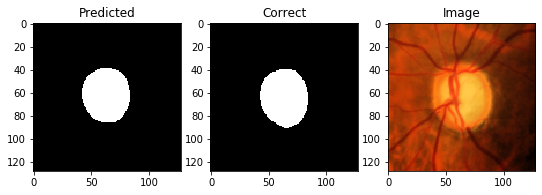

IOU: 0.8774566650390625
Dice: 0.9347290640394089
image #43


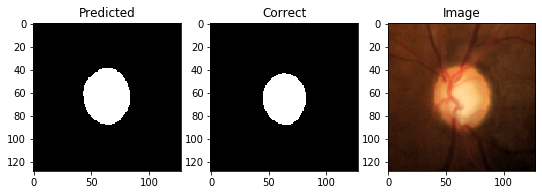

IOU: 0.8294723033905029
Dice: 0.9067886035877594
image #44


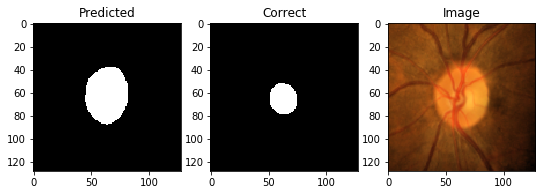

IOU: 0.35314443707466125
Dice: 0.5219611848825332
image #45


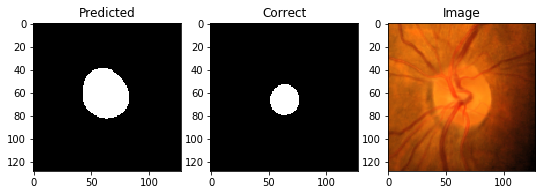

IOU: 0.3859522044658661
Dice: 0.5569487983281086
image #46


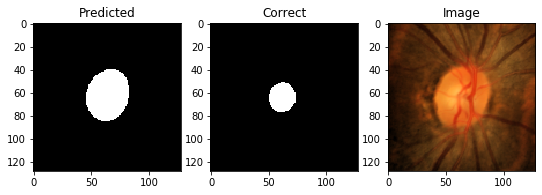

IOU: 0.35611239075660706
Dice: 0.5251959686450168
image #47


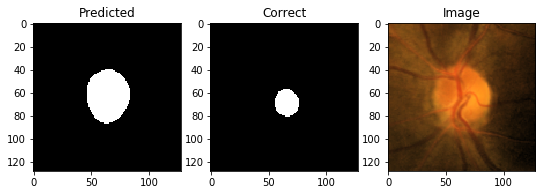

IOU: 0.29298892617225647
Dice: 0.4531963470319635
image #48


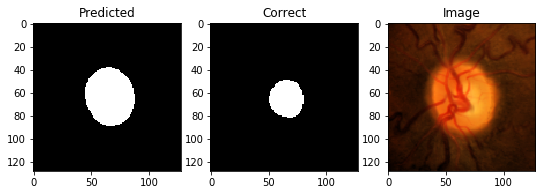

IOU: 0.4556143581867218
Dice: 0.6260096930533118
image #49


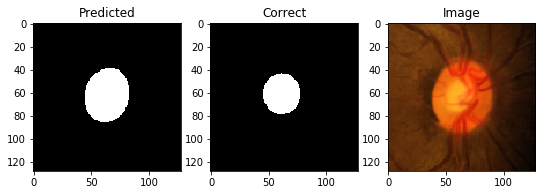

IOU: 0.6273552179336548
Dice: 0.7710120068610634


In [26]:
pred_iou, pred_dice = [], []
pred_cup = []

for i, img_no in enumerate(test_idx):
    print('image #{}'.format(img_no))
    img = img_test[img_no]
    batch_X = X_valid[i:i + 1]
    batch_y = Y_valid[i:i + 1]
    
    pred = (model.predict(batch_X)[0, 0] > 0.5).astype(np.float64)
    pred_cup.append(pred)
    corr = th_to_tf_encoding(batch_y)[0, ..., 0]
        
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(pred, cmap=plt.cm.Greys_r)
    ax.set_title('Predicted')
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(corr, cmap=plt.cm.Greys_r)
    ax.set_title('Correct')
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(th_to_tf_encoding(batch_X)[0])
    ax.set_title('Image')
    plt.show()
    
    cur_iou = K.eval(mean_IOU_gpu(pred[None, None, ...], corr[None, None, ...]))
    cur_dice = K.eval(dice(pred[None, None, ...], corr[None, None, ...]))
    print('IOU: {}\nDice: {}'.format(cur_iou, cur_dice))
    pred_iou.append(cur_iou)
    pred_dice.append(cur_dice)

Acquiring scores for the validation set:

In [29]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.7591828
0.8507234889005559


### Loading model

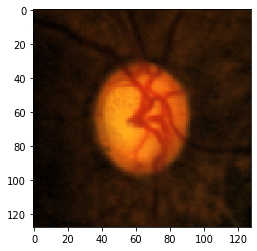

In [31]:
X_valid, Z_valid = next(data_generator(img_test, disc_test, disc_locations_test, train_or_test='test', batch_size=100, stationary=True))

In [ ]:
history = model.fit_generator(data_generator(img_train, disc_train, disc_locations, train_or_test='train', batch_size=1), 
                              steps_per_epoch=99,
                              max_queue_size=1,                    
                              validation_data=(X_valid, Z_valid),                              
                              epochs=500, verbose=1,                              
                              callbacks=[CSVLogger(os.path.join(folder(weights_folder), 'training_log_disc_color.csv')),
                                         ModelCheckpoint(os.path.join(folder(weights_folder),
                                               'last_checkpoint_disc_color.hdf5'),
                                               monitor='val_loss', mode='min', save_best_only=True, 
                                               save_weights_only=False, verbose=0)])

Epoch 1/500
99/99 [==============================] - 39s 393ms/step - loss: 0.1527 - mean_IOU_gpu: 0.7416 - dice_metric: 0.8416 - val_loss: 0.0476 - val_mean_IOU_gpu: 0.8875 - val_dice_metric: 0.9396
Epoch 2/500
99/99 [==============================] - 40s 402ms/step - loss: 0.0828 - mean_IOU_gpu: 0.8276 - dice_metric: 0.9025 - val_loss: 0.0460 - val_mean_IOU_gpu: 0.8891 - val_dice_metric: 0.9409
Epoch 3/500
99/99 [==============================] - 40s 404ms/step - loss: 0.0692 - mean_IOU_gpu: 0.8493 - dice_metric: 0.9159 - val_loss: 0.0502 - val_mean_IOU_gpu: 0.8771 - val_dice_metric: 0.9341
Epoch 4/500
99/99 [==============================] - 41s 416ms/step - loss: 0.0591 - mean_IOU_gpu: 0.8619 - dice_metric: 0.9248 - val_loss: 0.0519 - val_mean_IOU_gpu: 0.8738 - val_dice_metric: 0.9321
Epoch 5/500
99/99 [==============================] - 42s 425ms/step - loss: 0.0565 - mean_IOU_gpu: 0.8676 - dice_metric: 0.9282 - val_loss: 0.0538 - val_mean_IOU_gpu: 0.8686 - val_dice_metric: 0.9291


Epoch 42/500
99/99 [==============================] - 123s 1s/step - loss: 0.0427 - mean_IOU_gpu: 0.8951 - dice_metric: 0.9443 - val_loss: 0.2999 - val_mean_IOU_gpu: 0.5719 - val_dice_metric: 0.7164
Epoch 43/500
99/99 [==============================] - 123s 1s/step - loss: 0.0477 - mean_IOU_gpu: 0.8850 - dice_metric: 0.9381 - val_loss: 0.2129 - val_mean_IOU_gpu: 0.6546 - val_dice_metric: 0.7830
Epoch 44/500
99/99 [==============================] - 125s 1s/step - loss: 0.0476 - mean_IOU_gpu: 0.8851 - dice_metric: 0.9384 - val_loss: 0.1821 - val_mean_IOU_gpu: 0.6882 - val_dice_metric: 0.8088
Epoch 45/500
99/99 [==============================] - 126s 1s/step - loss: 0.0471 - mean_IOU_gpu: 0.8861 - dice_metric: 0.9390 - val_loss: 0.2094 - val_mean_IOU_gpu: 0.6571 - val_dice_metric: 0.7854
Epoch 46/500
99/99 [==============================] - 126s 1s/step - loss: 0.0458 - mean_IOU_gpu: 0.8898 - dice_metric: 0.9412 - val_loss: 0.2270 - val_mean_IOU_gpu: 0.6396 - val_dice_metric: 0.7719
Epoch

99/99 [==============================] - 151s 2s/step - loss: 0.0400 - mean_IOU_gpu: 0.9020 - dice_metric: 0.9481 - val_loss: 0.1542 - val_mean_IOU_gpu: 0.7310 - val_dice_metric: 0.8391
Epoch 125/500
99/99 [==============================] - 149s 2s/step - loss: 0.0369 - mean_IOU_gpu: 0.9089 - dice_metric: 0.9518 - val_loss: 0.1890 - val_mean_IOU_gpu: 0.6861 - val_dice_metric: 0.8077
Epoch 126/500
99/99 [==============================] - 154s 2s/step - loss: 0.0380 - mean_IOU_gpu: 0.9063 - dice_metric: 0.9504 - val_loss: 0.2303 - val_mean_IOU_gpu: 0.6431 - val_dice_metric: 0.7748
Epoch 127/500
99/99 [==============================] - 156s 2s/step - loss: 0.0367 - mean_IOU_gpu: 0.9088 - dice_metric: 0.9519 - val_loss: 0.1266 - val_mean_IOU_gpu: 0.7669 - val_dice_metric: 0.8636
Epoch 128/500
99/99 [==============================] - 153s 2s/step - loss: 0.0353 - mean_IOU_gpu: 0.9124 - dice_metric: 0.9539 - val_loss: 0.1993 - val_mean_IOU_gpu: 0.6753 - val_dice_metric: 0.7998
Epoch 129/500


99/99 [==============================] - 160s 2s/step - loss: 0.0336 - mean_IOU_gpu: 0.9151 - dice_metric: 0.9554 - val_loss: 0.1743 - val_mean_IOU_gpu: 0.7101 - val_dice_metric: 0.8240
Epoch 166/500
99/99 [==============================] - 160s 2s/step - loss: 0.0360 - mean_IOU_gpu: 0.9106 - dice_metric: 0.9529 - val_loss: 0.2596 - val_mean_IOU_gpu: 0.6194 - val_dice_metric: 0.7561
Epoch 167/500
99/99 [==============================] - 162s 2s/step - loss: 0.0333 - mean_IOU_gpu: 0.9165 - dice_metric: 0.9563 - val_loss: 0.1512 - val_mean_IOU_gpu: 0.7356 - val_dice_metric: 0.8427
Epoch 168/500
99/99 [==============================] - 163s 2s/step - loss: 0.0338 - mean_IOU_gpu: 0.9149 - dice_metric: 0.9553 - val_loss: 0.1670 - val_mean_IOU_gpu: 0.7156 - val_dice_metric: 0.8286
Epoch 169/500
99/99 [==============================] - 165s 2s/step - loss: 0.0341 - mean_IOU_gpu: 0.9139 - dice_metric: 0.9547 - val_loss: 0.2300 - val_mean_IOU_gpu: 0.6469 - val_dice_metric: 0.7779
Epoch 170/500


99/99 [==============================] - 215s 2s/step - loss: 0.0345 - mean_IOU_gpu: 0.9150 - dice_metric: 0.9553 - val_loss: 0.1307 - val_mean_IOU_gpu: 0.7635 - val_dice_metric: 0.8611
Epoch 207/500
99/99 [==============================] - 207s 2s/step - loss: 0.0324 - mean_IOU_gpu: 0.9185 - dice_metric: 0.9573 - val_loss: 0.1289 - val_mean_IOU_gpu: 0.7666 - val_dice_metric: 0.8631
Epoch 208/500
99/99 [==============================] - 207s 2s/step - loss: 0.0348 - mean_IOU_gpu: 0.9122 - dice_metric: 0.9539 - val_loss: 0.1401 - val_mean_IOU_gpu: 0.7512 - val_dice_metric: 0.8529
Epoch 209/500
99/99 [==============================] - 209s 2s/step - loss: 0.0344 - mean_IOU_gpu: 0.9130 - dice_metric: 0.9543 - val_loss: 0.1576 - val_mean_IOU_gpu: 0.7298 - val_dice_metric: 0.8381
Epoch 210/500
99/99 [==============================] - 211s 2s/step - loss: 0.0337 - mean_IOU_gpu: 0.9163 - dice_metric: 0.9561 - val_loss: 0.1468 - val_mean_IOU_gpu: 0.7422 - val_dice_metric: 0.8470
Epoch 211/500


99/99 [==============================] - 268s 3s/step - loss: 0.0325 - mean_IOU_gpu: 0.9181 - dice_metric: 0.9571 - val_loss: 0.1015 - val_mean_IOU_gpu: 0.8046 - val_dice_metric: 0.8883
Epoch 248/500
99/99 [==============================] - 271s 3s/step - loss: 0.0325 - mean_IOU_gpu: 0.9187 - dice_metric: 0.9574 - val_loss: 0.1223 - val_mean_IOU_gpu: 0.7745 - val_dice_metric: 0.8688
Epoch 249/500
99/99 [==============================] - 270s 3s/step - loss: 0.0316 - mean_IOU_gpu: 0.9199 - dice_metric: 0.9581 - val_loss: 0.0776 - val_mean_IOU_gpu: 0.8408 - val_dice_metric: 0.9111
Epoch 250/500
99/99 [==============================] - 288s 3s/step - loss: 0.0311 - mean_IOU_gpu: 0.9226 - dice_metric: 0.9595 - val_loss: 0.0820 - val_mean_IOU_gpu: 0.8338 - val_dice_metric: 0.9067
Epoch 251/500
99/99 [==============================] - 272s 3s/step - loss: 0.0319 - mean_IOU_gpu: 0.9197 - dice_metric: 0.9580 - val_loss: 0.1479 - val_mean_IOU_gpu: 0.7418 - val_dice_metric: 0.8467
Epoch 252/500


In [ ]:
pred_iou, pred_dice = [], []
pred_disc = []

for i, img_no in enumerate(test_idx):
    print('image #{}'.format(img_no))
    img = img_train[img_no]
    batch_X = X_valid[i:i + 1]
    batch_z = Z_valid[i:i + 1]
    
    pred = (model.predict(batch_X)[0, 0] > 0.5).astype(np.float64)
    pred_disc.append(pred)
    corr = th_to_tf_encoding(batch_z)[0, ..., 0]
        
    fig = plt.figure(figsize=(9, 4))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(pred, cmap=plt.cm.Greys_r)
    ax.set_title('Predicted')
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(corr, cmap=plt.cm.Greys_r)
    ax.set_title('Correct')
    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(th_to_tf_encoding(batch_X)[0])
    ax.set_title('Image')
    plt.show()
    
    cur_iou = K.eval(mean_IOU_gpu(pred[None, None, ...], corr[None, None, ...]))
    cur_dice = K.eval(dice(pred[None, None, ...], corr[None, None, ...]))
    print('IOU: {}\nDice: {}'.format(cur_iou, cur_dice))
    pred_iou.append(cur_iou)
    pred_dice.append(cur_dice)

In [ ]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

In [ ]:
def ellipseFitting(img):
    contours, hierarchy = cv2.findContours(img.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    ellipse = np.zeros(img.shape)
    diametro = []
    for ind, cont in enumerate(contours):
        (x,y),(MA,ma),angle = cv2.fitEllipse(cont)
        diametro.append((MA, ma))
        cv2.ellipse(ellipse,(int(x),int(y)),(int(MA/2), int(ma/2)),angle,0,360,(255,255,255),0)
    return ellipse, diametro

In [ ]:
import cv2
cdrs = []
for i, img_no in enumerate(test_idx):
    cup = pred_cup[i]
    disc = pred_disc[i]
        
    c = cv2.Canny(cup.astype(np.uint8), 1,1)
    d = cv2.Canny(disc.astype(np.uint8), 1,1)
    
    el_c, diam_c = ellipseFitting(c)
    el_d, diam_d = ellipseFitting(d)
        
    if len(diam_d) > 0 and len(diam_c) > 0:
        cdr = diam_c[0][1]/diam_d[0][1]
        cdrs.append(cdr)
        print('image #{} - cdr = {}'.format(img_no, cdr))
